<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

#### Load the csv file

In [2]:
df1= pd.read_csv('emp_attrition.csv')

In [3]:
df1.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [4]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [5]:
df1['Attrition']

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
1575    Yes
1576     No
1577    Yes
1578     No
1579    Yes
Name: Attrition, Length: 1580, dtype: object

In [6]:
df1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
dfn=df1.select_dtypes(np.number)
ncols=dfn.columns
ncols

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

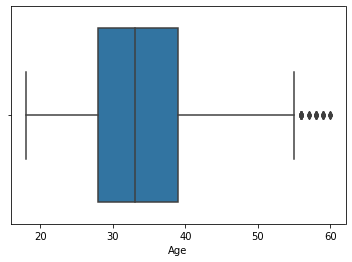

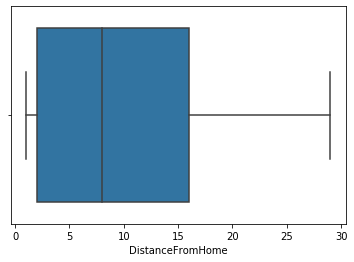

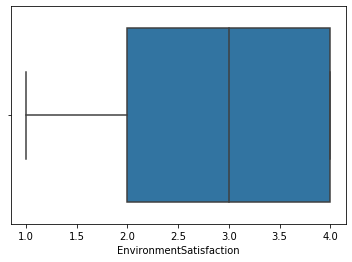

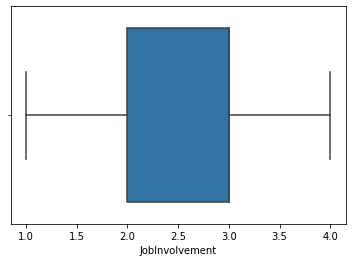

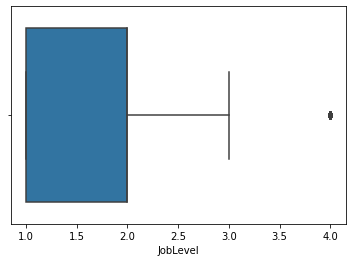

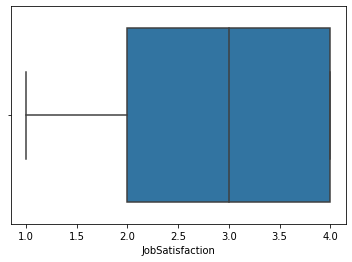

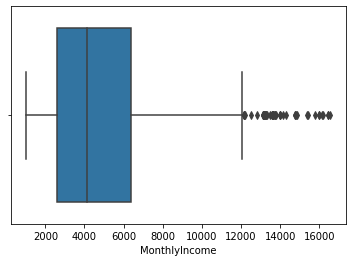

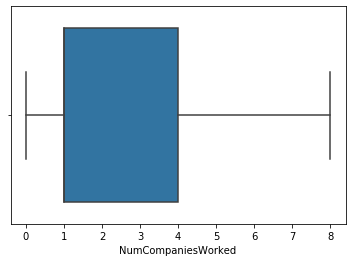

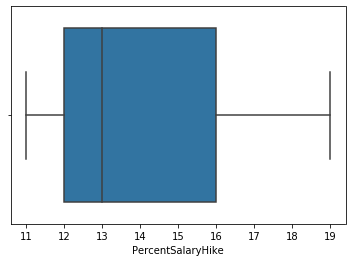

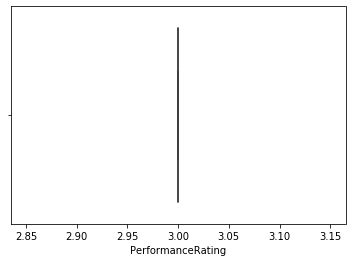

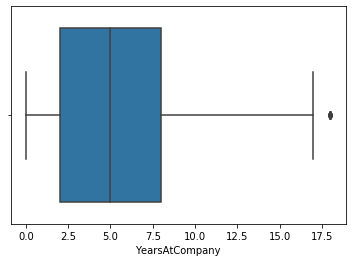

In [8]:
for i in ncols:
    sns.boxplot(df1[i])
    plt.show()

In [9]:
a=['Age','JobLevel','MonthlyIncome','YearsAtCompany']
for i in a:
    q1=np.percentile(df1[i],25)
    q3=np.percentile(df1[i],75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    df1=df1.drop(df1[df1[i]>ul].index)
    df1=df1.drop(df1[df1[i]<ll].index)



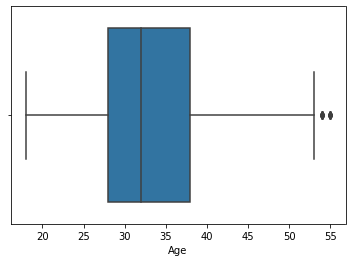

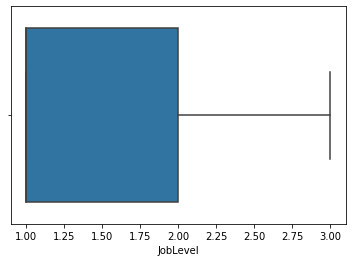

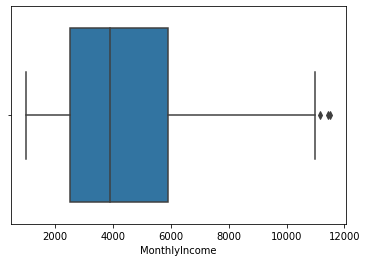

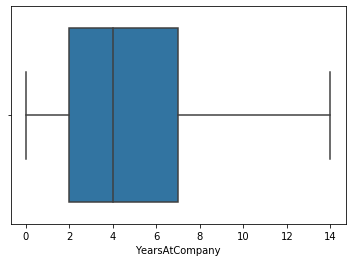

In [10]:
for i in a:
    sns.boxplot(df1[i])
    plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear')

In [12]:
df1['Attrition']=df1['Attrition'].replace({'Yes':1,'No':0})

In [13]:
x=df1[['EnvironmentSatisfaction','MonthlyIncome']]
y=df1['Attrition']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print('Accuracy score for the trained model:',accuracy_score(y_train,y_train_pred))
print('Accuracy score for the tested model:',accuracy_score(y_test,y_test_pred))

Accuracy score for the trained model: 0.5777998017839445
Accuracy score for the tested model: 0.5935334872979214


In [15]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,1,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,1,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,1,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,0,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,0,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,30,0,Travel_Rarely,Research & Development,2,Medical,2,Male,2,1,Laboratory Technician,4,2720,0,No,13,3,5
1575,28,1,Non-Travel,Research & Development,24,Technical Degree,2,Male,2,3,Healthcare Representative,1,8722,1,No,12,3,10
1577,30,1,Travel_Rarely,Sales,9,Medical,2,Male,3,1,Sales Representative,4,1081,1,No,13,3,1
1578,31,0,Travel_Frequently,Research & Development,1,Life Sciences,3,Female,3,2,Manufacturing Director,1,4148,1,No,12,3,4


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df1['OverTime']=df1['OverTime'].replace({'Yes':1,'No':0})
df1['Gender']=df1['Gender'].replace({'Male':1,'Female':0})

In [17]:
dfc=df1.select_dtypes('object')

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dfc.columns:
    df1[i]=le.fit_transform(df1[i])

In [159]:
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
lr.fit(x_train,y_train)
lr.coef_
dfc=df(lr.coef_).T
dfc['odd_ratio']=(np.exp(dfc[0])-1)*100
dfc=dfc.set_index(x_train.columns)
dfc['odd_ratio'].sort_values(ascending=False).head(3)

OverTime             321.959519
PerformanceRating    279.132339
Department            46.441347
Name: odd_ratio, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

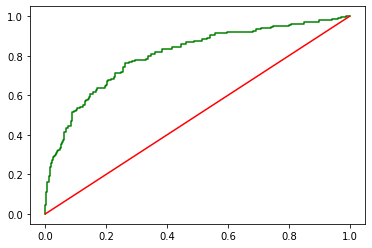

AUC Score: 0.7394998618402875


In [21]:
from sklearn.metrics import roc_curve,roc_auc_score

y_train_pred= lr.predict(x_train)
y_train_prob= lr.predict_proba(x_train)
y_train_prob= y_train_prob[:,1:]

fpr,tpr,threshold=roc_curve(y_train,y_train_prob)

plt.plot(fpr,tpr,color='g')
plt.plot(fpr,fpr,color='r')
plt.show()

print('AUC Score:',roc_auc_score(y_train,y_train_pred))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from sklearn.metrics import confusion_matrix as cm

print('Confusion Matrix:\n\n',cm(y_train,y_train_pred))

Confusion Matrix:

 [[413 126]
 [135 335]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
tn=413
tp=335
fp=126
fn=135

sp = tn/(tn+fp)*100
ss = tp/(tp+fn)*100

print('Specificity :',sp)
print('Sensitivity :',ss)


Specificity : 76.62337662337663
Sensitivity : 71.27659574468085


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

x=df1.drop('Attrition',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

dtc.fit(x_train,y_train)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dtc=DecisionTreeClassifier()
params={'max_leaf_nodes':[5]}
gsearch=GridSearchCV(dtc,param_grid=params,scoring='roc_auc',cv=3,return_train_score=True)
gsearch.fit(x_train,y_train)

dtc= DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
dtc=DecisionTreeClassifier()
params={'max_depth':np.arange(1,15),'min_samples_split':[5,10,20,40,80,100,120,140],
       'min_samples_leaf':[1,2,3,8,12,16,20,24],
       'criterion':['gini','entropy']}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,scoring='roc_auc',cv=10,return_train_score=True)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': [1, 2, 3, 8, 12, 16,
                                                             20, 24],
                                        'min_samples_split': [5, 10, 20, 40, 80,
                                                              100, 120, 140]},
                   return_train_score=True, scoring='roc_auc')

In [86]:
from sklearn.metrics import accuracy_score as asc

dtc= DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(x_train,y_train)

y_train_pred= dtc.predict(x_train)
y_test_pred= dtc.predict(x_test)

print('Accuracy Score of train:',asc(y_train,y_train_pred))
print('Accuracy Score of test:',asc(y_test,y_test_pred))

Accuracy Score of train: 0.8523290386521308
Accuracy Score of test: 0.7644341801385681


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

from sklearn.model_selection import RandomizedSearchCV

dtc = DecisionTreeClassifier()
params={'criterion':['entropy', 'gini'],'max_depth' : np.arange(2,11),'min_samples_split' : np.arange(2,11)}
rsearch = RandomizedSearchCV(dtc,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
rsearch.fit(x_train,y_train)

dtc = DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
from sklearn.model_selection import RandomizedSearchCV

dtc= DecisionTreeClassifier()
dtc=DecisionTreeClassifier()
params={'criterion':['entropy'], 'max_depth':[8], 'min_samples_split':[5]}
rsearch = RandomizedSearchCV(dtc,param_distributions=params,cv=10,scoring='roc_auc',return_train_score=True)
rsearch.fit(x_train,y_train)
rsearch.best_params_

{'min_samples_split': 5, 'max_depth': 8, 'criterion': 'entropy'}

In [96]:
from sklearn.metrics import roc_auc_score

dtc = DecisionTreeClassifier(**rsearch.best_params_)
dtc.fit(x_train,y_train)

y_train_pred = dtc.predict(x_train)
y_train_prob = dtc.predict_proba(x_train)[:,1:]

print('ROC_AUC_SCORE:',roc_auc_score(y_train,y_train_prob))

ROC_AUC_SCORE: 0.9822938459716575


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [168]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train,y_train)
dtc1 = DecisionTreeClassifier()
params={'max_features':}
rsearch=RandomizedSearchCV(dtc1,param_distributions=params,n_jobs=-1,cv=3)
rsearch.fit(x_train,y_train)
dtc1 = DecisionTreeClassifier(**rsearch.best_params_)
dtc1.fit(x_train,y_train)

ValueError: max_features must be in (0, n_features]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here

<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']
rfc.fit(x_train,y_train)

y_train_pred = rfc.predict(x_train)
y_train_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']
rfc.fit(x_train,y_train)

from sklearn.model_selection import RandomizedSearchCV

rfc= RandomForestClassifier()
params={'criterion' : ['entropy', 'gini'],'n_estimators' : [90, 100, 150, 200],'max_depth' : [10, 15, 20],
        'min_samples_split' : [2, 5, 8]}
rsearch = RandomizedSearchCV(rfc,param_distributions=params,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)

rsearch.fit(x_train,y_train)
rsearch.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'max_depth': 20,
 'criterion': 'gini'}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
params = {'n_estimators': [90],
 'min_samples_split': [2],
 'max_depth': [20],
 'criterion': ['gini']}

rsearch = RandomizedSearchCV(rfc,param_distributions=params,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
rsearch.fit(x_train,y_train)

rfc = RandomForestClassifier(**rsearch.best_params_)

rfc.fit(x_train,y_train)

y_train_prob = rfc.predict_proba(x_train)[:,1:]

print('ROC_AUC_Score:',roc_auc_score(y_train,y_train_prob))

ROC_AUC_Score: 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [139]:
fi=df(rfc.feature_importances_,index=x.columns,columns=['Feature Importance'])
fi['Feature Importance'].sort_values(ascending=False).head(10)

Age                        0.136695
MonthlyIncome              0.128620
YearsAtCompany             0.090242
DistanceFromHome           0.089983
OverTime                   0.073205
PercentSalaryHike          0.065620
NumCompaniesWorked         0.064094
EnvironmentSatisfaction    0.056270
JobSatisfaction            0.056169
JobInvolvement             0.046177
Name: Feature Importance, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
x=df1[['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome',
       'OverTime', 'PercentSalaryHike', 'NumCompaniesWorked',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
model=df(rfc.feature_importances_,index=x.columns,columns=['Feature Imp'])
y_train_pred= rfc.predict(x_train)
model

,Feature Imp
Age,0.167957
MonthlyIncome,0.180874
YearsAtCompany,0.111839
DistanceFromHome,0.114095
OverTime,0.076092
PercentSalaryHike,0.078486
NumCompaniesWorked,0.079557
EnvironmentSatisfaction,0.071450
JobSatisfaction,0.064778
JobInvolvement,0.054871


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [151]:
from sklearn.metrics import confusion_matrix as cm,roc_curve


y_train_pred = rfc.predict(x_train)
y_train_prob = rfc.predict_proba(x_train)[:,1:]
print('Confusion Matrix:\n\n',cm(y_train,y_train_pred))

Confusion Matrix:

 [[539   0]
 [  0 470]]


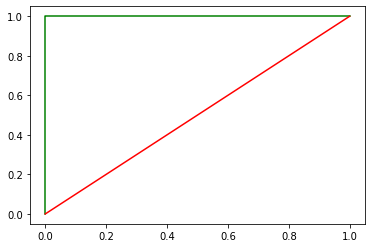

In [154]:
fpr,tpr,threshold=roc_curve(y_train,y_train_prob)

plt.plot(fpr,tpr,color='g')
plt.plot(fpr,fpr,color='r')
plt.show()